## 1. Data Discovery

In [26]:
# Step 1
# Import neccessary libraries
import scipy
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [3]:
# Step 2

# Create the dataframe from the five .csv files for the Gas Turbine data
file_path = r'C:\Users\Jay\Documents\Github\MSE413-ML\Lab 1\Data'
list_of_dfs = [] # List of dataframes for the files

for filename in os.listdir(file_path):
    if filename.endswith('.csv'):        
        temp_dfs = pd.read_csv(file_path + '\\' + filename) # Read the file name, adding the file path 
        list_of_dfs.append(temp_dfs) # Append the list_of_dfs list, to easily concat in the future

gt_df = pd.concat(list_of_dfs, ignore_index=True) # Concat the data vertically stacking onto each other
                                                  # Ignore the indices

# Delete the temperary dataframes
del list_of_dfs, temp_dfs

In [4]:
# Step 3

print('The Shape of the gt_df is:', np.shape(gt_df))

The Shape of the gt_df is: (36733, 11)


In [18]:
# Step 4

gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [19]:
# Step 5

gt_df.describe()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


Yes, the shape of the dataframe is consistent with the total number of data mentioned in the data set, that being, 36733 entries, with 11 different independent variables.
All features are non-null and of Dtype float64

In [20]:
# Step 6

gt_df.mode(axis=0)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,11.920,1012.1,100.12,3.2115,24.308,1100.0,550.01,133.78,11.891,0.11124,60.38
1,18.525,NaN,100.14,4.0076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23.969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Showing the percentage difference would be nice in the future, it'll help show the significance of the different, normalizing it.

The modes for AT specifically are skewed, ranging from 11.92 to 23.969 being the most common values. When compared to the mean, of 17.71, the mode of 18.525 alligns best with this. However, this delta is still large enough to draw concern about what is happening with sensor AT.

AP aligns the Mode and mean very close, differing by less than 1. 
AH shows a large discrepency between the two. 
AFDP is fairly close, however still cause for concern
GTEP is fairly close, differing by ~1
TIT is differing by 19
TAT fairly close differing by ~4
TEY is very close differing by 0.2
CDP Is very close aswell, differing by ~0.2
CO is a large difference wowie, 2.2 difference
NOX is fairly close, 60 vs 65

Yes, skewness is present when comparing the mode and mean between the ones that are very large deltas. 

array([[<Axes: title={'center': 'AT'}>, <Axes: title={'center': 'AP'}>,
        <Axes: title={'center': 'AH'}>],
       [<Axes: title={'center': 'AFDP'}>,
        <Axes: title={'center': 'GTEP'}>,
        <Axes: title={'center': 'TIT'}>],
       [<Axes: title={'center': 'TAT'}>, <Axes: title={'center': 'TEY'}>,
        <Axes: title={'center': 'CDP'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'NOX'}>,
        <Axes: >]], dtype=object)

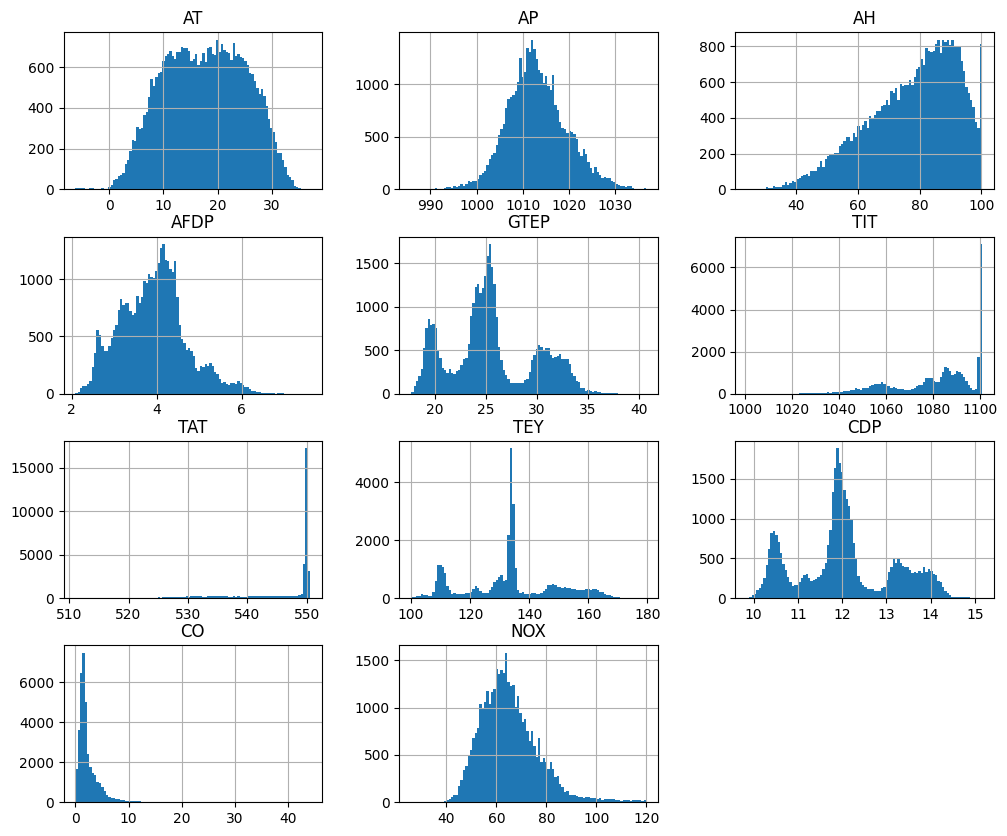

In [9]:
# Plot a histogram with 100 bins for each of the 11 features resulting in 11 different histograms
gt_df.hist(bins=100, figsize=(12, 10))


6. a) From above, its clear that there's a fairly normal/Guassian distributation among some of the variables.

AT shows a somewhat normal distributation, 
AP as well
NOX does too

b) Yes, there appears to be capped data, in TIT and TAT. CO might also show capped data. This is recognizable based on a large frequency being shown at a specific value, followed by a drop off on the histogram. NOX probably is capped data as well, considering the large spike around 135.++

Final Answer: TIT, TAT, CO, TEY... I think. CO is kinda weird im not 100% sure about it

c) Yes, I see multimodal data. Specifically CDP, both show multiple modes. 

In [27]:
# Step 7: 

# Correlation matrix
corr_mat = gt_df.corr()
corr_mat['TEY'].sort_values(ascending=False)

TEY     1.000000
CDP     0.988778
GTEP    0.964127
TIT     0.910297
AFDP    0.665483
AP      0.118224
AT     -0.091152
NOX    -0.116127
AH     -0.137360
CO     -0.569813
TAT    -0.682396
Name: TEY, dtype: float64

The top 4 correlated features with TEY are:J CDP, GTEP, TIT, and TAT. 

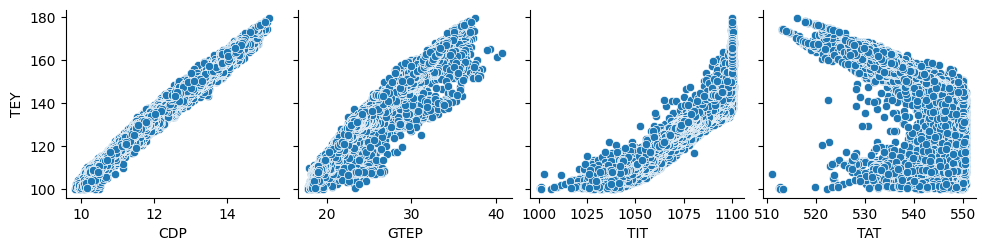

In [32]:
sns.pairplot(gt_df,y_vars='TEY', x_vars=['CDP', 'GTEP', 'TIT', 'TAT'])

In [40]:
corr_mat['CO'].sort_values(ascending=False)

CO      1.000000
NOX     0.340606
AH      0.106586
AP      0.067050
TAT     0.058353
AT     -0.174326
AFDP   -0.448425
GTEP   -0.518909
CDP    -0.551027
TEY    -0.569813
TIT    -0.706275
Name: CO, dtype: float64

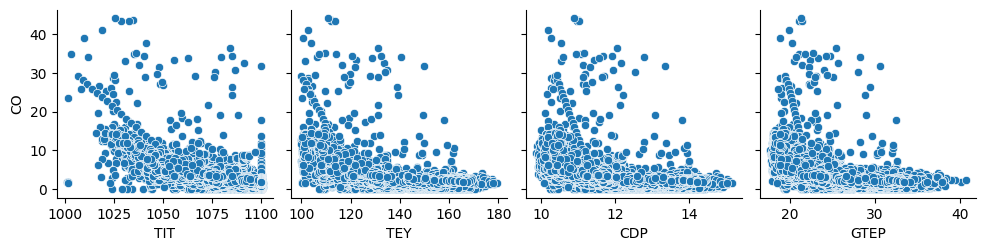

In [39]:
sns.pairplot(gt_df,y_vars='CO', x_vars=['TIT', 'TEY', 'CDP', 'GTEP'])

In [41]:
corr_mat['NOX'].sort_values(ascending=False)

NOX     1.000000
CO      0.340606
AP      0.191938
AH      0.164617
TAT    -0.092791
TEY    -0.116127
CDP    -0.171256
AFDP   -0.188247
GTEP   -0.201630
TIT    -0.213865
AT     -0.558174
Name: NOX, dtype: float64

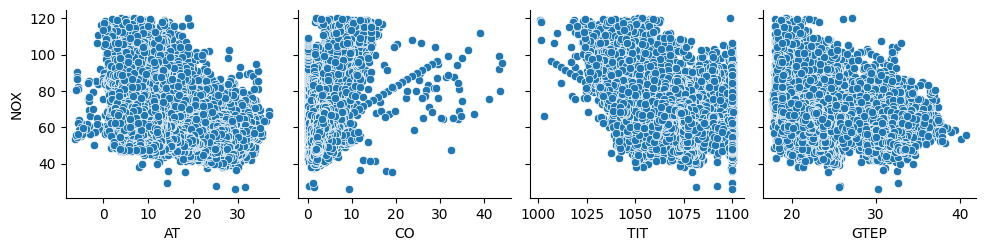

In [42]:
sns.pairplot(gt_df,y_vars='NOX', x_vars=['AT', 'CO', 'TIT', 'GTEP'])

NOX: 'AT', 'CO', 'TIT', 'GTEP'
CO: ['TIT', 'TEY', 'CDP', 'GTEP']
TEY: ['CDP', 'GTEP', 'TIT', 'TAT']
AT
TIT
GTEP
CDP
TAT


TIT shows up in all of them 
CDP in 2 of them
GTEP is shown in all of them

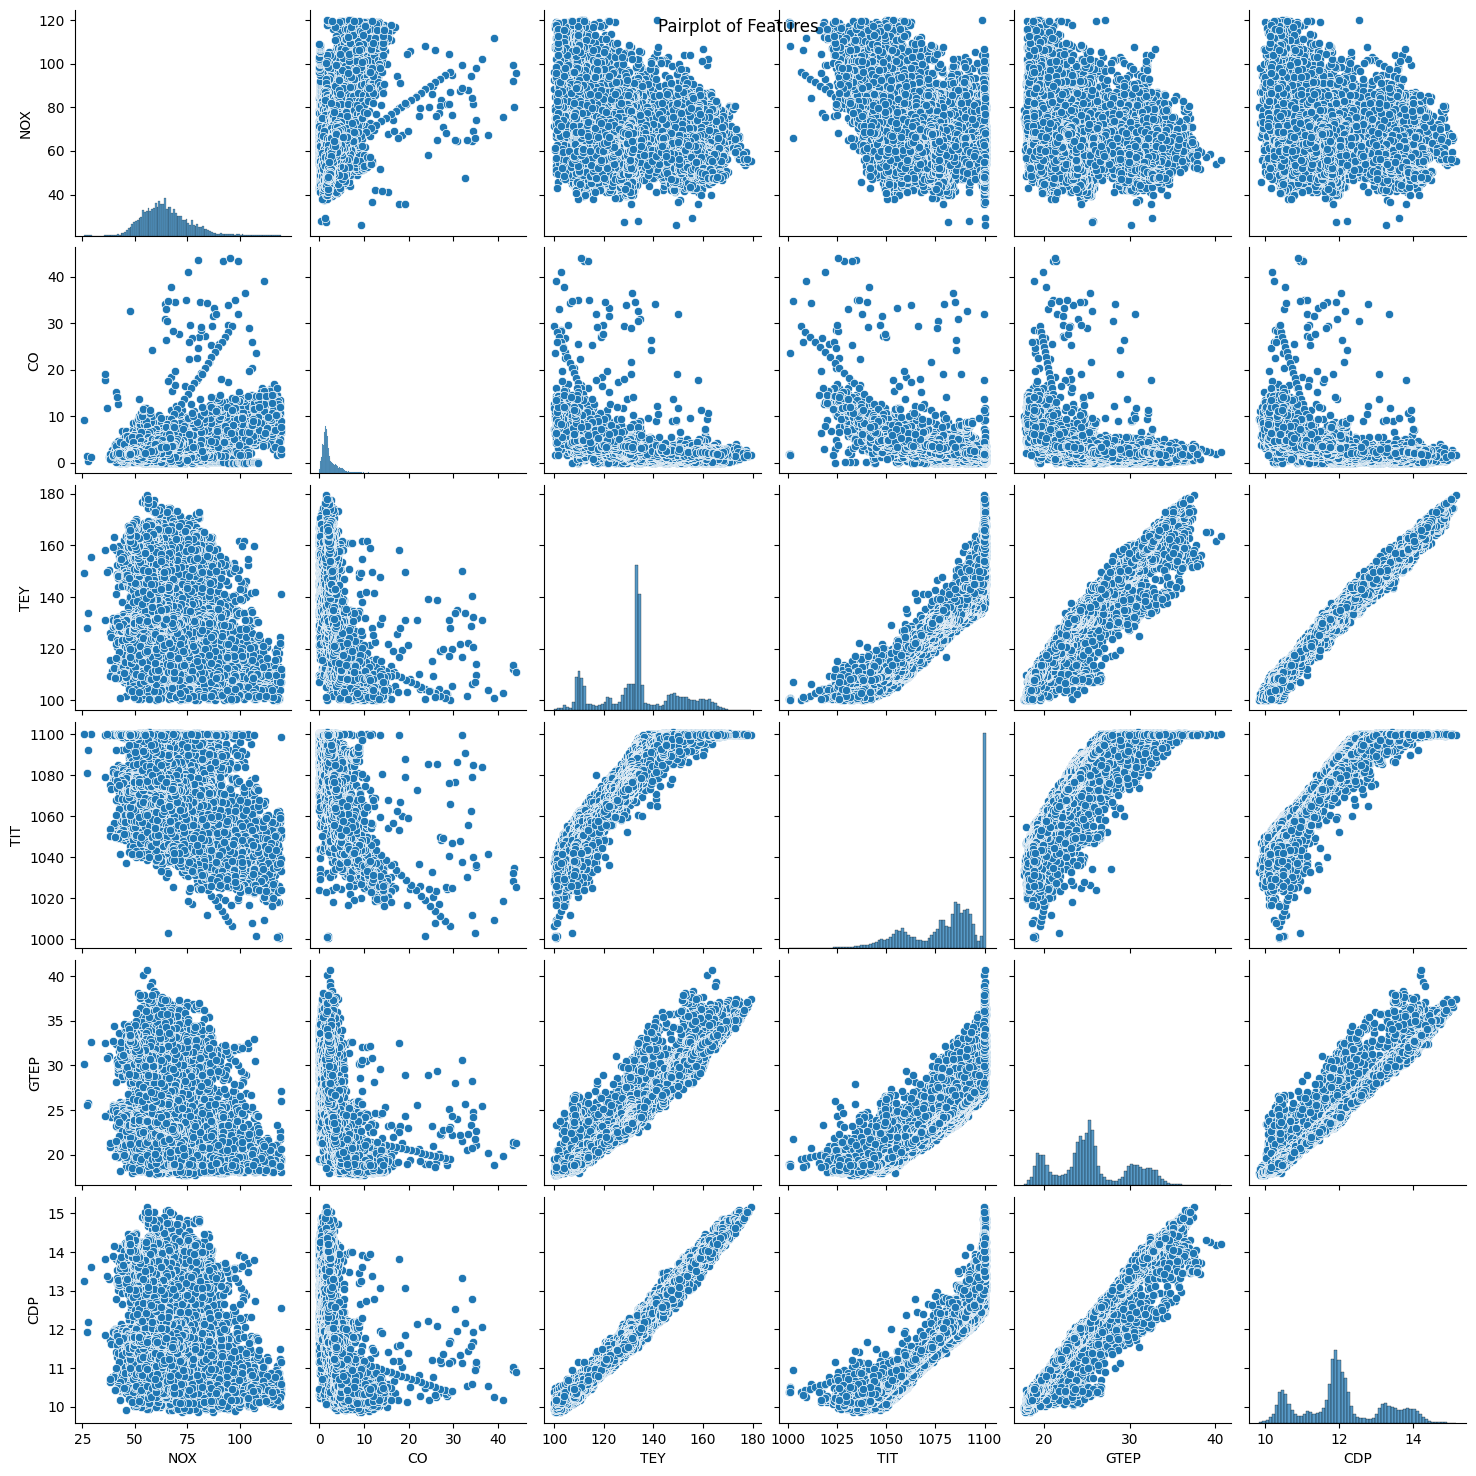

In [47]:
features_sub = gt_df[['NOX', 'CO', 'TEY','TIT','GTEP','CDP']]
sns.pairplot(features_sub)
plt.suptitle('Pairplot of Features')
plt.show()

In [48]:
correlation_matrix = features_sub.corr()
correlation_matrix

,NOX,CO,TEY,TIT,GTEP,CDP
NOX,1.000000,0.340606,-0.116127,-0.213865,-0.201630,-0.171256
CO,0.340606,1.000000,-0.569813,-0.706275,-0.518909,-0.551027
TEY,-0.116127,-0.569813,1.000000,0.910297,0.964127,0.988778
TIT,-0.213865,-0.706275,0.910297,1.000000,0.874234,0.908469
GTEP,-0.201630,-0.518909,0.964127,0.874234,1.000000,0.978470
CDP,-0.171256,-0.551027,0.988778,0.908469,0.978470,1.000000


Yes, there are a few that seem like they could be combined into new features such as:

TEY and CDP with a r value of 0.988778
TEY and GTEP with a r value of 0.964127

TEY and CDP 
TEY and GTEP 
CDP and GTEP with a 0.978470

therefore we can combine them! i think  

In [56]:
# Step 9: Splitting the data
from sklearn.model_selection import train_test_split
target = features_sub[['TEY','CO','NOX']]
X_train, X_test, Y_train, Y_test = train_test_split(features_sub.drop(['TEY', 'CO', 'NOX'], axis=1), target, test_size=0.2, random_state=1)